# Artificial Neural Networks

### Data
Composed of $X$ and $y$

 - X comes with shape $[d \times n]$ 
 - Each column vector is another unique observation with d features
 - There is a corresponding real value in vector $y$ with shape $[1 \times n]$

 
### Architecture of an ANN
 
![](Figures/ANN_Weights.pdf)

## Forward Propagation

$\hspace{8cm}$ Take the input data (here $d^{[0]} = d$)

$$
a^{[0]} = X
$$

$\hspace{8cm}$ Calculate the outcome of next layer

\begin{equation} \label{eq1}
\begin{split}
z^{[i+1]} & =  W^{[i+1]} a^{[i]} + b^{[i+1]} \\
a^{[i+1]} & = \sigma(z^{[i+1]})
\end{split}
\end{equation}





__Check Dimensions__

> $W^{[1]} a^{[0]}$ with dimensions $[d^{[1]} \times d^{[0]}]$ and $[d^{[0]} \times n]$ outputs first hidden layer with dimensions $[d^{[1]} \times n]$.

Similarly
>$W^{[i+1]} a^{[i]}$ outputs a vector with shape $[d^{[i+1]} \times d^{[i]}] \times [d^{[i]} \times n] = [d^{[i + 1]} \times n]$ 


![](Figures/board.JPG)

# Data
 - Recruitment Robot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import requests
import io

url = "https://raw.githubusercontent.com/uzay00/KaVe-Egitim/master/ARGE/Sorular/1-İseAlımRobotu/data.csv"
s = requests.get(url).content

data = pd.read_csv(io.StringIO(s.decode('utf-8')))
M = data.values
X = M[:,:-1]
y = M[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# For our implemenatation, transposes are needed. 
X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.T, y_test.T

In [2]:
X_train.shape, y_train.shape

((4, 670), (1, 670))

In [3]:
data.head()

,age,algorithm,gpa,social,y
0,3.576113,3.728920,0.930603,4.438372,1
1,1.829891,4.393183,3.137649,4.831307,1
2,3.981593,4.050717,3.886304,4.865860,1
3,1.734623,4.605488,2.605315,3.663224,1
4,2.759050,4.288383,1.894925,3.238931,1


In [4]:
data.y.value_counts()

0    900
1    100
Name: y, dtype: int64

## Linear Transformation

$$W^{[1]} \times a^{[0]} = z^{[1]}$$

In [5]:
W1 = np.random.randint(2, size = (3,5))
W1.shape

(3, 5)

In [6]:
a0 = np.random.randint(2, size = (5,4))
a0.shape

(5, 4)

In [7]:
z1 = W1.dot(a0)
z1.shape

(3, 4)

In [8]:
print(W1.shape , ' x ', a0.shape,  ' = ',z1.shape)

(3, 5)  x  (5, 4)  =  (3, 4)


# Neural Network Architecture

In [9]:
layers = [4,6,6,1]

weight_dims = list(zip(layers[1:], layers[:-1]))
bias_dims = layers[1:]

print("weight_dims: ", weight_dims)
print("bias_dims: ", bias_dims)

weight_dims:  [(6, 4), (6, 6), (1, 6)]
bias_dims:  [6, 6, 1]


In [10]:
weights = [np.random.randn(n,d)/100 for n,d in weight_dims]
biases = [np.random.randn(d)/100 for d in bias_dims]

print("weights ", weights)
print("biases: ", biases)

weights  [array([[-5.95136176e-03, -8.72526068e-03,  3.51001906e-03,
        -2.49713031e-02],
       [ 1.77030761e-03,  1.90876641e-02, -1.70467431e-03,
        -3.95179288e-03],
       [ 5.52508507e-03,  8.83471460e-03,  5.85029047e-03,
        -1.05700277e-03],
       [ 1.21930602e-05, -7.19373220e-03, -5.12881058e-03,
         3.38183406e-02],
       [ 6.15977882e-03, -6.91112889e-03,  1.30390317e-02,
        -2.00034223e-03],
       [ 3.90375581e-03, -1.70140264e-02,  7.64309775e-03,
        -1.41606243e-03]]), array([[ 1.79105706e-02, -1.07201846e-02, -2.08700360e-03,
         6.15802500e-03,  3.98329153e-03, -1.42860230e-02],
       [ 4.66410846e-03, -5.08275826e-03,  6.81888539e-03,
        -3.10676869e-03,  1.36876312e-02,  5.91755352e-03],
       [-4.68766698e-03, -1.21026980e-02, -5.71955055e-03,
         1.64690089e-02,  9.02612004e-03,  2.33710864e-03],
       [-5.16878077e-03,  4.77685188e-03, -2.26766412e-03,
        -1.99173208e-02,  4.12529057e-03,  5.05099555e-03],
  

# Forward Propagation

In [11]:
weights[0].shape, X_train.shape

((6, 4), (4, 670))

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def derivative_sigmoid(z):
    s = sigmoid(z)
    return s * (1.0-s)

In [13]:
a = X_train
for i in range(len(weights)):
    W = weights[i]
    b = biases[i]
    z = W.dot(a) + b.reshape(-1,1)
    a = sigmoid(z)

In [14]:
a.shape, y_train.shape

((1, 670), (1, 670))

## Calculate Error

In [15]:
def cross_entropy_loss(a, y):
    cost = - (y* np.log(a) + (1 - y) * (np.log(1 - a)))
    return cost

In [16]:
#cross_entropy_loss(a, y_train)

## $\hspace{7cm}$Backward Propagation

#### $\hspace{8cm}$Vectorized Cost Function 
$$
J =  \frac{1}{n}( - y \log a^{[i+1]}  - (1 - y) \log (1 - a^{[i+1]}))
$$

#### $\hspace{8cm}$Error at last layer to backpropagate

\begin{equation} 
\begin{split}
dz^{[i+1]}
&= \frac{\partial J}{\partial z^{[i+1]}} &= \frac{\partial J}{\partial a^{[i+1]}}  \frac{\partial a^{[i+1]}}{\partial z^{[i+1]}}  \\
& &= \frac{1}{n} \left( \frac{-y}{a^{[i+1]}} - (-1) \frac{1-y}{1- a^{[i+1]}}\right)  \frac{\partial a^{[i+1]}}{\partial z^{[i+1]}}\\
& &= \frac{1}{n} \left( \frac{a^{[i+1]}-y}{a^{[i+1]}(1-a^{[i+1]})}\right) \left(a^{[i+1]}(1-a^{[i+1]})\right)\\
& &= \frac{1}{n}  \left(a^{[i+1]}-y\right)
\end{split}
\end{equation}

$\hspace{8cm}$ __In python:__ `dz = np.mean(a-y)`


### $\hspace{7cm}$Backpropagate to previous layer
### $\hspace{8cm}$Forward
\begin{equation} 
\begin{split}
a^{[i]} 
&= \sigma(z^{[i]})\\
z^{[i+1]} 
&=  W^{[i+1]} a^{[i]} + b^{[i+1]} \\
\end{split}
\end{equation}

### $\hspace{8cm}$Backward

\begin{equation} 
\begin{split}
dz^{[i]} 
&= \frac{\partial J}{\partial z^{[i]}} &=   \frac{\partial J}{\partial z^{[i+1]}} \frac{\partial z^{[i+1]}}{\partial a^{[i]}} \frac{\partial a^{[i]}}{\partial z^{[i]}}\\
& &= \left(  \left(W^{[i+1]}\right)^{T} dz^{[i+1]} \right)  \sigma'(z^{[i]})\\
\end{split}
\end{equation}

$\hspace{8cm}$ __In python:__ `dz = np.dot(W.T , dz) * derivative_sigma(z)` 

##### $\hspace{8cm}$ Dimension Check

\begin{equation} 
\begin{split}
W^{[i+1]} & \rightarrow & \;[d^{[i+1]}, d^{[i]}] \\
dz^{[i+1]} & \rightarrow & \;[d^{[i+1]}, 1] \\
z^{[i]} & \rightarrow & \;[d^{[i]},1] \\
\end{split}
\end{equation}

## Backward Propagation

####  Cost Function for one example
$$
J =  - y_{i} \log a_{i}  - (1 - y_{i}) \log (1 - a))
$$


### Architecture of an ANN
 
![](Figures/ANN_Weights.pdf)

#### Error at last layer to backpropagate
For one example
\begin{equation} 
\begin{split}
dz 
&= \frac{\partial J}{\partial z} &= \frac{\partial J}{\partial a}  \frac{\partial a}{\partial z}  \\
& &= \frac{a-y}{a(1-a)} a(1-a)\\
& &= a-y
\end{split}
\end{equation}

Error for whole dataset
\begin{equation} 
\begin{split}
dz 
&= np.mean(a-y)
\end{split}
\end{equation}

#### Backward Propagation
\begin{equation} 
\begin{split}
dz^{[i]} 
&= \frac{\partial J}{\partial z^{[i]}} &=   \frac{\partial J}{\partial z^{[i+1]}} \frac{\partial z^{[i+1]}}{\partial a^{[i]}} \frac{\partial a^{[i]}}{\partial z^{[i]}}\\
& &= dz^{[i+1]} W^{[i+1]}  \sigma'(z^{[i]})\\
& &= np.dot(W^{[i+1]}.T, dz^{[i+1]}) \sigma'(z^{[i]})
\end{split}
\end{equation}

#### Update Parameters

$\hspace{8cm}$ Weight update

\begin{equation} 
\begin{split}
\frac{\partial J}{\partial W^{[i+1]}} 
&= \frac{\partial J}{\partial z^{[i+1]}} \frac{\partial z^{[i+1]}}{\partial W^{[i+1]}} \\
&= dz^{[i+1]} a^{[i]}.T \\
\end{split}
\end{equation}

$\hspace{8cm}$ Bias update

\begin{equation} 
\begin{split}
\frac{\partial J}{\partial b^{[i+1]}} 
&= \frac{\partial J}{\partial z^{[i+1]}} \frac{\partial z^{[i+1]}}{\partial b^{[i+1]}} \\
&= dz^{[i+1]}\\
\end{split}
\end{equation}


#### Key to backprogation

\begin{equation} 
\begin{split}
dz^{[i+1]}
&= 
\frac{\partial J}{\partial z^{[i+1]}} \\
\end{split}
\end{equation}

In [17]:
# forward propagation
a = X_train
cache = {'a0':a}
for i in range(len(weights)):
    W = weights[i]
    b = biases[i]
    z = W.dot(a) + b.reshape(-1,1)
    a = sigmoid(z)
    
    cache[f'W{i+1}'] = W
    cache[f'b{i+1}'] = b
    cache[f'a{i+1}'] = a
    cache[f'z{i+1}'] = z

In [18]:
[(key, cache[key].shape) for key in cache.keys()]

[('a0', (4, 670)),
 ('W1', (6, 4)),
 ('b1', (6,)),
 ('a1', (6, 670)),
 ('z1', (6, 670)),
 ('W2', (6, 6)),
 ('b2', (6,)),
 ('a2', (6, 670)),
 ('z2', (6, 670)),
 ('W3', (1, 6)),
 ('b3', (1,)),
 ('a3', (1, 670)),
 ('z3', (1, 670))]

<figure> 
    <img src="Figures/w3.png" alt="flamingo", width="340"> 
    <figcaption><i>fig. 1</i> Update on last weight matrix</figcaption> 
</figure>


In [19]:
# dz[3]
dz = cache['a3'] - y_train ## Error at last layer
dz.shape

(1, 670)

In [20]:
db = dz.mean(axis = 1)
db

array([0.40166404])

In [21]:
cache['a2'].shape, cache['z3'].shape

((6, 670), (1, 670))

In [22]:
dw = dz.dot(cache['a2'].T)
dw.shape, cache['W3'].shape

((1, 6), (1, 6))

In [23]:
## Learning rate
alpha = 0.01

In [24]:
cache['W3'] = cache['W3'] - alpha * dw 
cache['W3'].shape

(1, 6)

In [25]:
cache['b3'] = cache['b3'] - alpha * db
cache['b3'].shape

(1,)

<figure> 
    <img src="Figures/w3.png" alt="flamingo", width="340"> 
    <figcaption><i>fig. 1</i> Update on last weight matrix</figcaption> 
</figure>

#### Backward Propagation
\begin{equation} 
\begin{split}
dz^{[i]} = np.dot(W^{[i+1]}.T, dz^{[i+1]}) \sigma'(z^{[i]})
\end{split}
\end{equation}




In [26]:
dz.shape

(1, 670)

In [27]:
# bacpropagate from d[z3] to d[z2]
dz = np.dot(cache['W3'].T, dz) * derivative_sigmoid(cache['z2'])
dz.shape

(6, 670)

<figure> 
    <img src="Figures/w2.png" alt="flamingo", width="340"> 
    <figcaption><i>fig. 1</i> Update on previous layer</figcaption> 
</figure>

#### Update Parameters

Weight update

\begin{equation} 
\begin{split}
\frac{\partial J}{\partial W^{[i+1]}} 
&= dz^{[i+1]} a^{[i]}.T \\
\end{split}
\end{equation}

Bias update

\begin{equation} 
\begin{split}
\frac{\partial J}{\partial b^{[i+1]}} 
&= dz^{[i+1]}\\
\end{split}
\end{equation}

In [28]:
dz.shape, cache['a2'].shape

((6, 670), (6, 670))

In [29]:
dw = dz.dot(cache['a1'].T)
dw.shape

(6, 6)

In [30]:
cache['W2'] = cache['W2'] - alpha * dw 
cache['W2'].shape

(6, 6)

In [31]:
db = dz.mean(axis = 1)
db.shape

(6,)

In [32]:
cache['b2'] = cache['b2'] - alpha * db
cache['b2'].shape

(6,)


#### Backward Propagation
\begin{equation} 
\begin{split}
dz^{[i]} = np.dot(W^{[i+1]}.T, dz^{[i+1]}) \sigma'(z^{[i]})
\end{split}
\end{equation}




In [33]:
dz.shape

(6, 670)

In [34]:
# bacpropagate from d[z2] to d[z1]
dz = np.dot(cache['W2'].T, dz) * derivative_sigmoid(cache['z1'])
dz.shape

(6, 670)

<figure> 
    <img src="Figures/w1.png" alt="flamingo", width="340"> 
    <figcaption><i>fig. 1</i> Update on previous layer</figcaption> 
</figure>


#### Update Parameters

Weight update

\begin{equation} 
\begin{split}
\frac{\partial J}{\partial W^{[i+1]}} 
&= dz^{[i+1]} a^{[i]}.T \\
\end{split}
\end{equation}

Bias update

\begin{equation} 
\begin{split}
\frac{\partial J}{\partial b^{[i+1]}} 
&= dz^{[i+1]}\\
\end{split}
\end{equation}

In [35]:
dw = dz.dot(cache['a0'].T)
dw.shape

(6, 4)

In [36]:
cache['W1'] = cache['W1'] - alpha * dw 
cache['W1'].shape

(6, 4)

In [37]:
db = dz.mean(axis = 1)
db.shape

(6,)

In [38]:
cache['b2'] = cache['b2'] - alpha * db
cache['b2'].shape

(6,)

# ANN From Scratch

In [39]:
def cross_entropy_loss(a, y):
    cost = - np.mean(y * np.log(a) + (1 - a) * np.log(1 - a))
    return np.squeeze(cost)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def derivative_sigmoid(z):
    s = sigmoid(z)
    return s * (1.0-s)

def construct(layers = [4,6,6,1]):
    weight_dims = list(zip(layers[1:], layers[:-1]))
    bias_dims = layers[1:]

    weights = [np.random.randn(n,d)/100.0 for n,d in weight_dims]
    biases = [np.random.randn(d,1)/100.0 for d in bias_dims]
    
    return weights, biases

def forward_propagation(X_train, weights, biases):
    # forward propagation
    a = X_train
    cache = {'a0':a}
    for i in range(len(weights)):
        W = weights[i]
        b = biases[i]
        z = W.dot(a) + b
        a = sigmoid(z)

        cache[f'W{i+1}'] = W
        cache[f'b{i+1}'] = b
        cache[f'a{i+1}'] = a
        cache[f'z{i+1}'] = z
    return cache

def backward_propagation(X_train, y_train, weights, biases,alpha = 0.01, epochs = 1000):
    cache = forward_propagation(X_train, weights, biases)
    last = len(cache)//4 
    n = X_train.shape[1]
    
    loss = cross_entropy_loss(cache[f'a{last}'], y_train)
    J = [loss]

    for epoch in range(epochs):
        dz = cache[f'a{last}'] - y_train # d[z3]
        for i in range(last,0,-1):
            db = dz.mean()
            dw = dz.dot(cache[f'a{i-1}'].T)/n

            # Gradient Descent
            cache[f'W{i}'] = cache[f'W{i}'] - alpha * dw 
            cache[f'b{i}'] = cache[f'b{i}'] - alpha * db

            # backpropagate from d[z3] to d[z2]
            if i == 1: break
            dz = np.dot(cache[f'W{i}'].T, dz) * derivative_sigmoid(cache[f'z{i-1}'])

        weights = [cache[f'W{i+1}'] for i in range(len(cache)//4)]
        biases = [cache[f'b{i+1}'] for i in range(len(cache)//4)]

        cache = forward_propagation(X_train, weights, biases)
        loss = cross_entropy_loss(cache[f'a{last}'], y_train)
        J.append(loss)
    return cache, J

def predict(X_test, cache):
    last = len(cache)//4
    
    weights = [cache[f'W{i+1}'] for i in range(last)]
    biases = [cache[f'b{i+1}'] for i in range(last)]
    
    new_cache = forward_propagation(X_test, weights, biases)
    a = new_cache[f'a{last}']
    
    return (a > 0.5) + 0

# Test

[[294   0]
 [  2  34]]


Text(0, 0.5, 'Loss J')

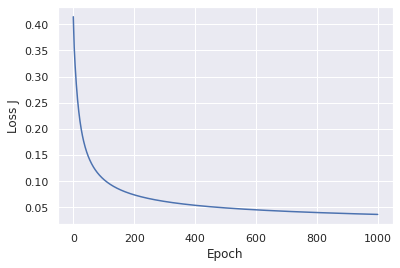

In [40]:
weights, biases = construct(layers = [4,1] )
cache, J = backward_propagation(X_train, y_train, weights, biases, alpha = 0.1, epochs = 1000)

y_pred = predict(X_test, cache)
print(confusion_matrix(y_test[0], y_pred[0]))

plt.plot(J);plt.xlabel('Epoch');plt.ylabel('Loss J')

In [41]:
[(key, cache[key].shape) for key in cache.keys()]

[('a0', (4, 670)),
 ('W1', (1, 4)),
 ('b1', (1, 1)),
 ('a1', (1, 670)),
 ('z1', (1, 670))]

[[294   0]
 [  2  34]]


Text(0, 0.5, 'Loss J')

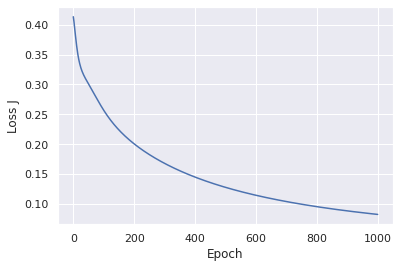

In [42]:
weights, biases = construct(layers = [4,6,1] )
cache, J = backward_propagation(X_train, y_train, weights, biases, alpha = 0.1, epochs = 1000)

y_pred = predict(X_test, cache)
print(confusion_matrix(y_test[0], y_pred[0]))

plt.plot(J);plt.xlabel('Epoch');plt.ylabel('Loss J')

In [43]:
[(key, cache[key].shape) for key in cache.keys()]

[('a0', (4, 670)),
 ('W1', (6, 4)),
 ('b1', (6, 1)),
 ('a1', (6, 670)),
 ('z1', (6, 670)),
 ('W2', (1, 6)),
 ('b2', (1, 1)),
 ('a2', (1, 670)),
 ('z2', (1, 670))]

In [44]:
dz = np.array([[2,2,2,2]])
np.sum(dz) / 4

2.0

# Pytorch

In [45]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import torch
import torch.optim as optim
import torch.nn as nn
from IPython import display

In [46]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.from_numpy(X_train.T).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Linear Model
learning_rate = 0.01 # alpha

# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(4, 6),
    nn.ReLU(),
    nn.Linear(6, 6),
    nn.ReLU(), # https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html?highlight=relu#torch.nn.ReLU
    nn.Linear(6, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate)
n_epoch = 1000
# Training
for t in range(n_epoch):
    
    # Feed forward to get the logits
    y_pred = model(x_train_tensor)
    
    # Compute the loss (BCE: Binary Cross Entropy Loss)
    loss = criterion(y_pred.T, y_train_tensor)
    # Dont accumulate previous gradients
    optimizer.zero_grad()

    print(f"[EPOCH]: {t}/{n_epoch}, [LOSS]: {loss.item():.6f}")
    display.clear_output(wait=True)
    
    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params. 
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999/1000, [LOSS]: 0.000097


In [47]:
x_test_tensor = torch.from_numpy(X_test.T).float().to(device)
y_test_pred = model(x_test_tensor)

In [48]:
y_test_pred = 1 * (y_test_pred > 0.5)

In [49]:
y_test_pred.shape, y_test.T.shape

(torch.Size([330, 1]), (330, 1))

In [50]:
print(confusion_matrix(y_test.T, y_test_pred))

[[294   0]
 [  1  35]]


In [51]:
y_test.T.flatten()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1.

In [52]:
y_test_pred.flatten()

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,